In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, ttest_ind, f_oneway, kruskal, shapiro, kstest
import statsmodels.api as sm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [39]:
import pandas as pd

# Read the data
df = pd.read_csv('/content/filtered_data.csv')
df_schema = pd.read_csv('/content/schema.csv')
df.shape

(18883, 70)

### **Create Subsets**

In [40]:
binary = df_schema[((df_schema['variable_type']=='binary') | (df_schema.index == 'Hospital Mortality')) & (df_schema.index != 'RRT')].index
ordinal = df_schema[((df_schema['variable_type'] == 'ordinal') | (df_schema.index == 'Hospital Mortality'))].index
cont_all = df_schema[((df_schema['variable_type'] == 'continuous') | (df_schema.index == 'Hospital Mortality')) & (df_schema['category'] != 'Treatment')].index

print("Length of Binary Variables:",len(binary))
print("Length of Ordinal Variables:",len(ordinal))
print("Length of Continuous Variables:",len(cont_all))


Length of Binary Variables: 28
Length of Ordinal Variables: 3
Length of Continuous Variables: 37


In [42]:
cont_all_df = df.iloc[:, cont_all]
binary_df = df.iloc[:,binary]
ordinal_df = df.iloc[:,ordinal]

print("Shape Binary Variables:", binary_df.shape)
print("Shape Ordinal Variables:", ordinal_df.shape)
print("Shape Continuous Variables:", cont_all_df.shape)

Shape Binary Variables: (18883, 28)
Shape Ordinal Variables: (18883, 3)
Shape Continuous Variables: (18883, 37)


In [37]:
binary_df.shape

(28, 70)

.**Quantitative variables can be further classified into:**

- ***Continuous variables:*** Also known as ratio variables. These are units of
measurement that can be represented in quantities less than 1. For instance, 0.8 km.

- ***Discrete or integer variables:*** Units that cannot be divided, such as 1 car or 1 tree.

- **Interval:**Variables that do not have a true zero (or it's arbitrary), or that zero value of that variable doesn't make sense. For example - IQ. Zero IQ doesn't mean anything. At the same time, person with IQ of 100 does not mean being twice as sharp to person with IQ of 50.
These variables have equal distance between values.

- **Ratio/Count:**Variables where zero value makes sense. For example - number of apples, 0 apples means nothing, while having 10 apples mean having twice as many as having 5 apples.
These variables have an intrinsic order with equal distance between values, howsoever small.

**Categorical variables are divided into the following variables:**

- ***Binary:*** Data that has one of two outcomes, such as yes/no or pass/fail.

- ***Nominal***: Used to describe data with no intrinsic order, such as brands, families, species.

- **Ordinal**: *italicized text* For ordered data types with observable scales of hierarchy, such as user ratings.

**Informal Rules:**

- Ordinal: Nominal + Order
- Interval: Order + Equal distance between values
- Ratio: Interval + True Zero

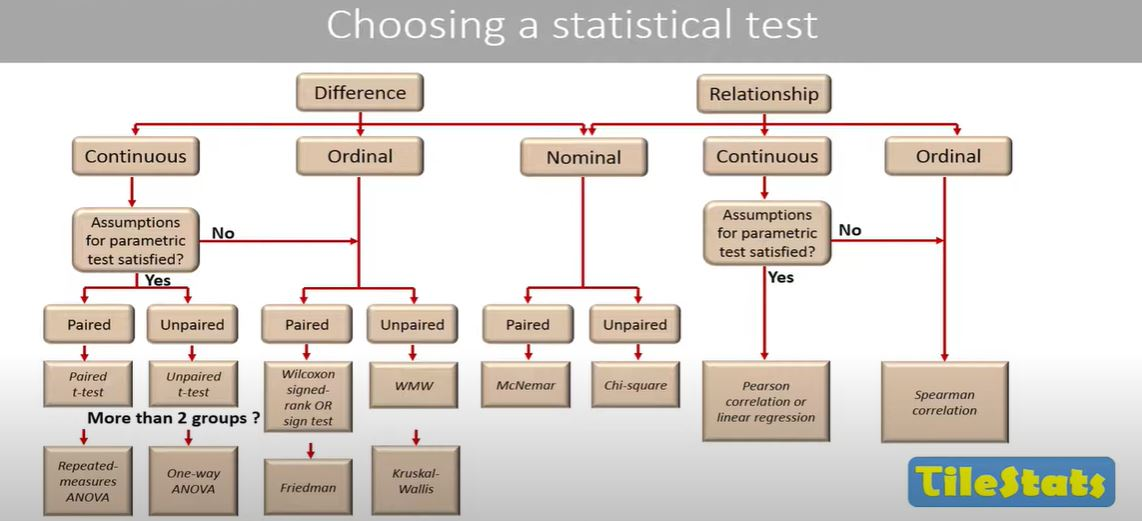

### **Continous Variables: Whether Parametric tests or Non-Parametric tests?**

Assumptions for Parametric Tests:
- **Independence of observations:** The separate observations (each variable entry) are unrelated to one another (for instance, repeating the same test on a single patient generates non-independent measurements, that is, repeated measurements).

- **Normality of data:** The data follows a normal distribution. This assumption is required only for quantitative data. (For more details, see also here)

- **Homogeneity of variance:** Each group being compared has a similar variance (i.e., the distribution, or “spread,” of scores around the mean). The “power” of the test to detect differences will be diminished if one group has significantly greater variation than the others.


####**Normality Tests- validate the Gaussian distribution of data.**

**Tests of equality of distributions:**

- **Shapiro-Wilk Test for normality**
- **Kolmogorov-Smirnov Test (KS-Test) of goodness of fit**
- **Q-Q plots**

##### **Shapiro-Wilk Test**
- Tests whether a data sample has a Gaussian distribution.
- **Assumption-**
  - Observations in each sample are independent and distributed identically.
- **Hypothesis**
  - H0: the sample has a Gaussian distribution.
  - H1: the sample does not have a Gaussian distribution.

In [43]:
# Perform Shapiro-Wilk test on each column in cont_all_df: continuous variables
for column in cont_all_df.columns[1:]:
    stat, p = stats.shapiro(cont_all_df[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"  Statistic: {stat}")
    print(f"  p-value: {p}")
    print("")

    if p < 0.05:
        print(f"The {column} does not follow normal distribution")
        print("---------------------------------------------------------------------")
    else:
        print(f"The {column}follows normal distribution")
        print("---------------------------------------------------------------------")

Shapiro-Wilk test for Max Heart Rate:
  Statistic: nan
  p-value: 1.0

The Max Heart Ratefollows normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for Min Heart Rate:
  Statistic: nan
  p-value: 1.0

The Min Heart Ratefollows normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for Mean Heart Rate:
  Statistic: nan
  p-value: 1.0

The Mean Heart Ratefollows normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for Max MAP:
  Statistic: nan
  p-value: 1.0

The Max MAPfollows normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for Min MAP:
  Statistic: nan
  p-value: 1.0

The Min MAPfollows normal distribution
---------------------------------------------------------------------
Shapiro-Wilk test for Mean MAP:
  Statistic: nan
  p-value: 1.0

The Mean MAPfollows normal

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Limitations.**
-  Sensitivity in large samples: The Shapiro-Wilk test is highly sensitive to even small deviations from normality in large samples.
-  This means that as the sample size increases, the test becomes more likely to reject the null hypothesis of normality, even if the deviations from normality are very small.

##### **Quantile-Quantile plot:**

- Plots data quantiles against theoretical quantiles.
- It also highlights the skewness of distribution. If data quantiles are higher than theoretical quantiles i.e., the Q-Q plot lies above the Y=X line, the data is positively and right-skewed. Else, otherwise.
- If there is deviation from Y=X line while considering normal as theoretical distribution, that means the variable is not-normal

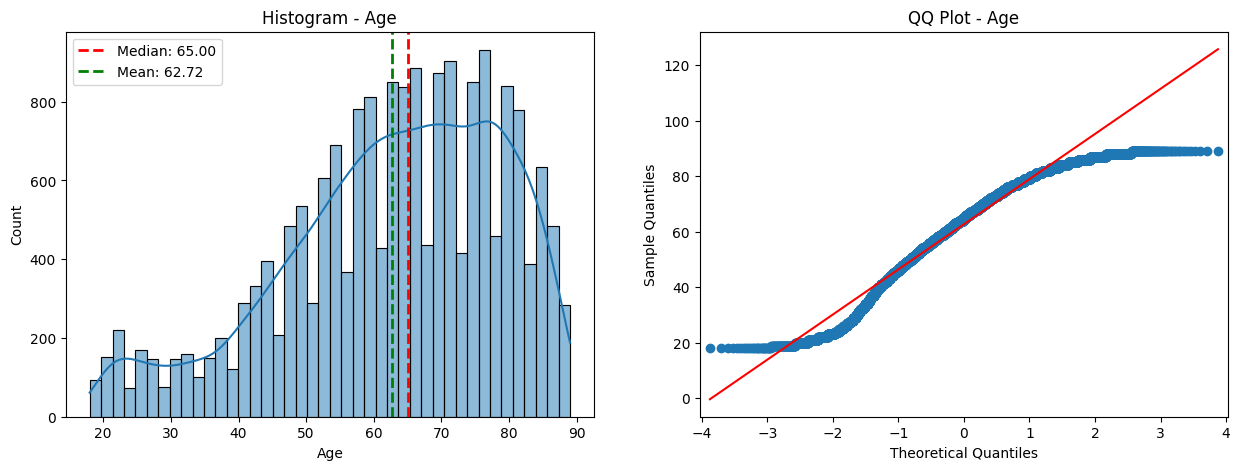

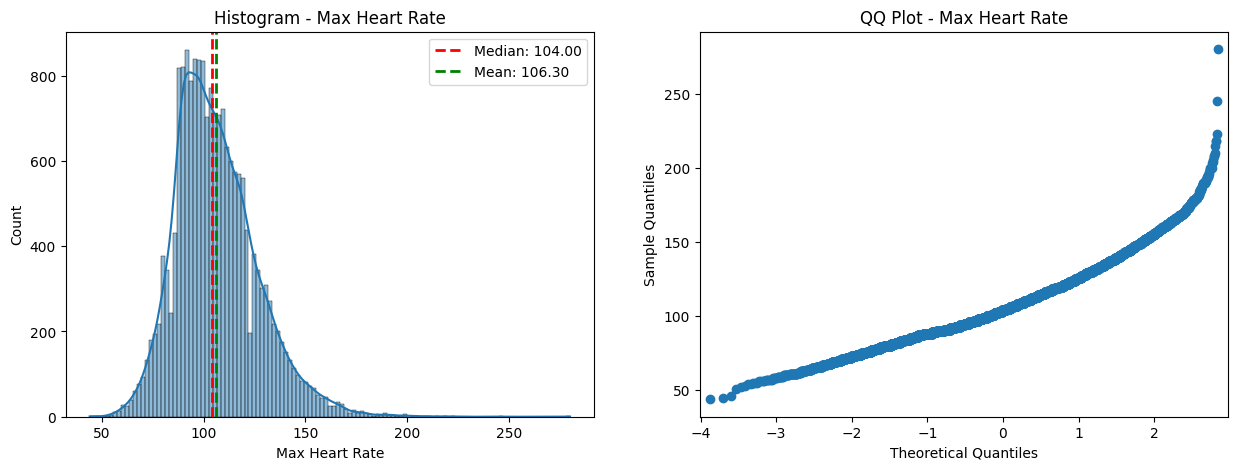

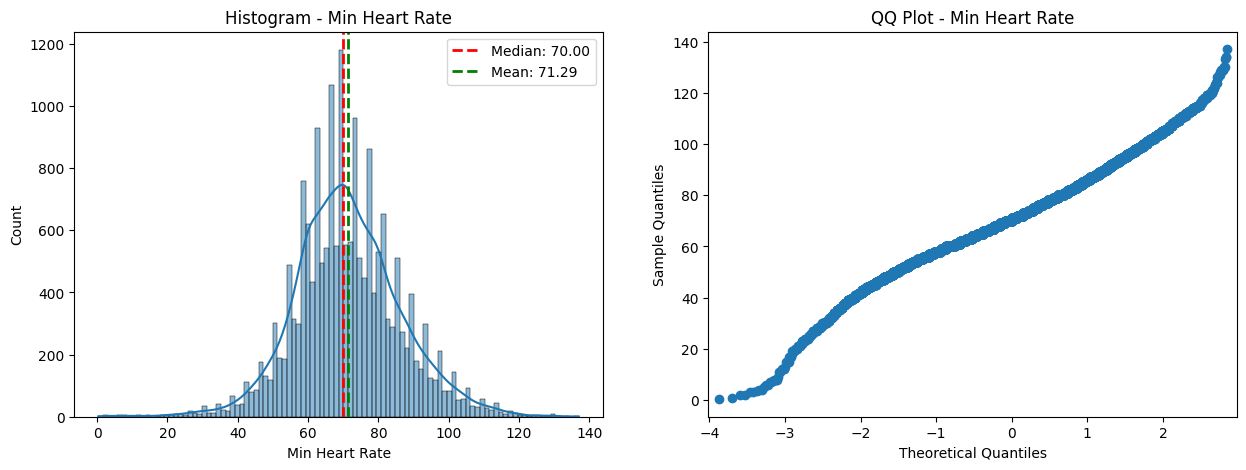

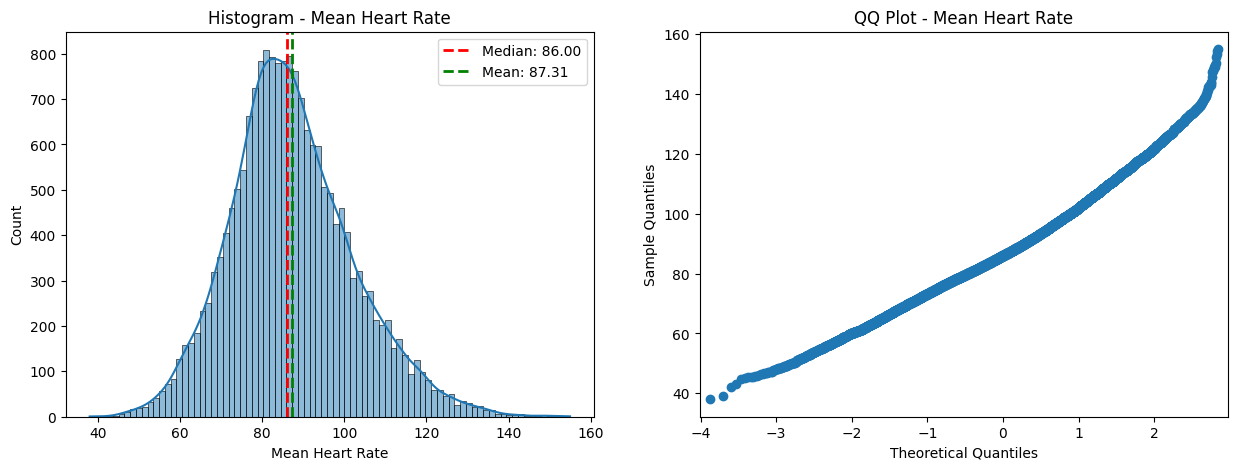

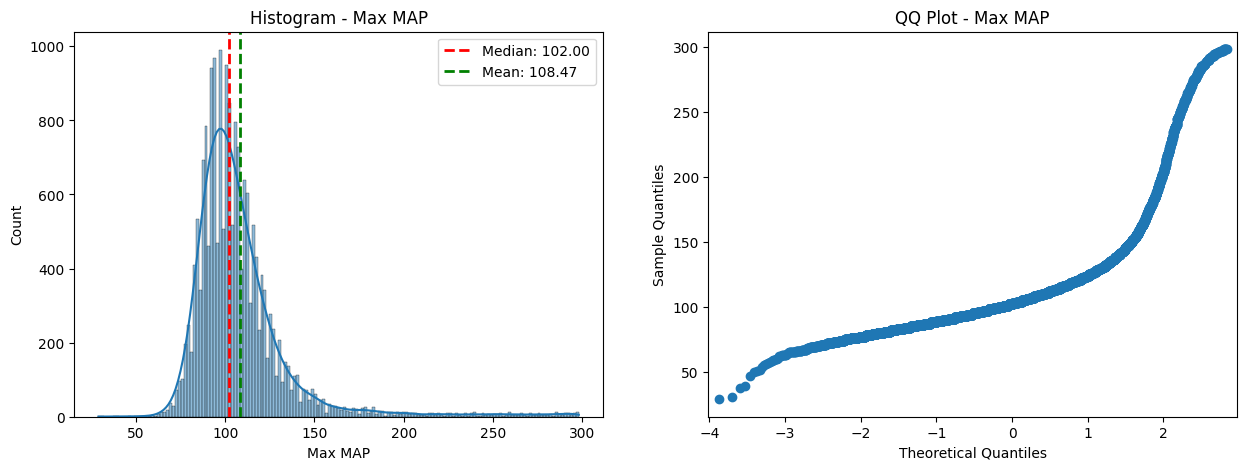

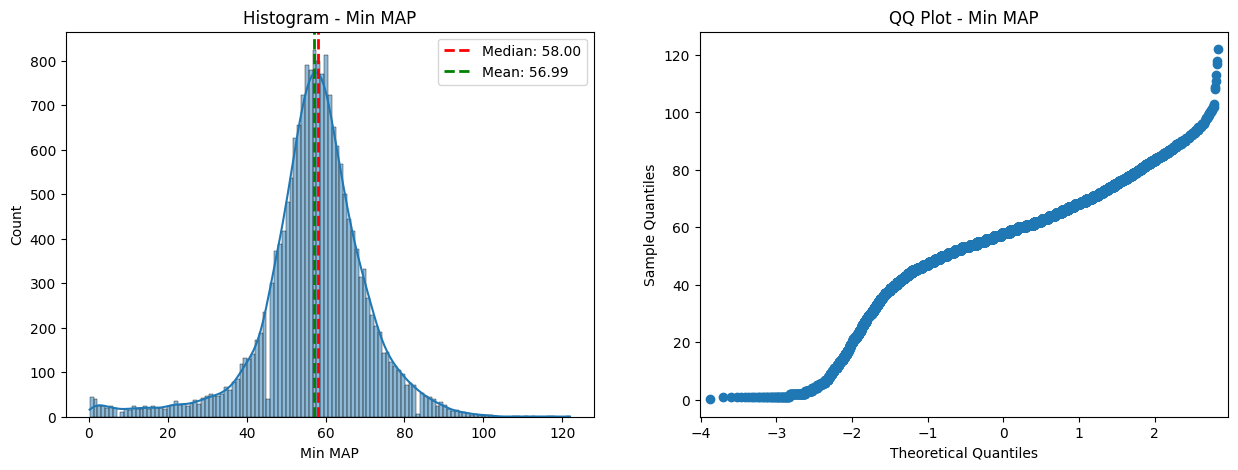

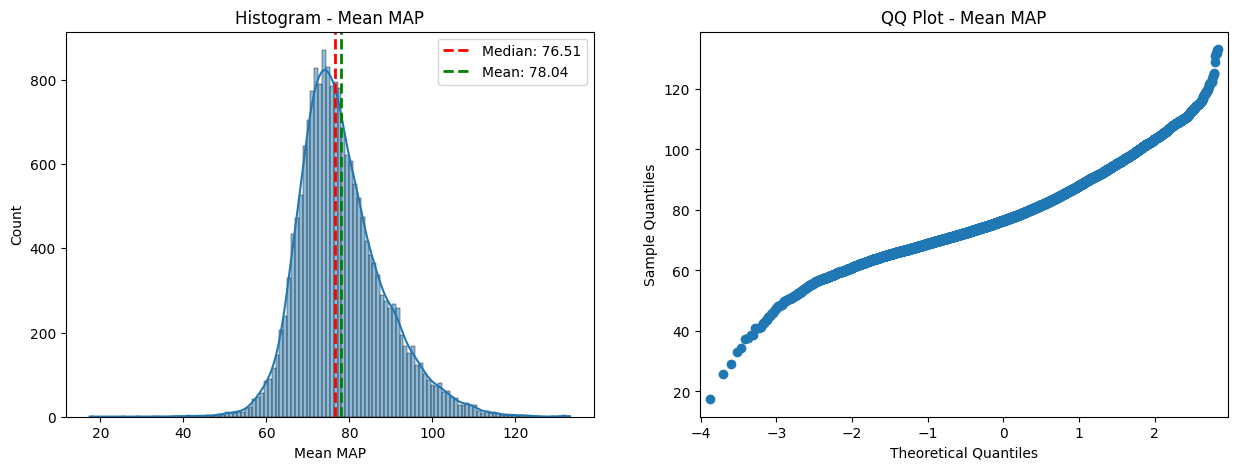

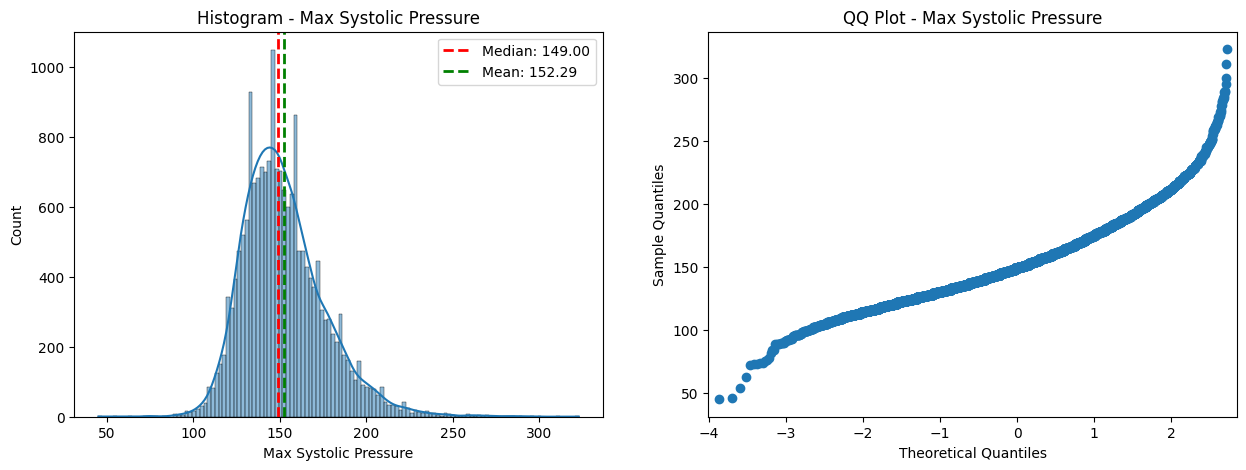

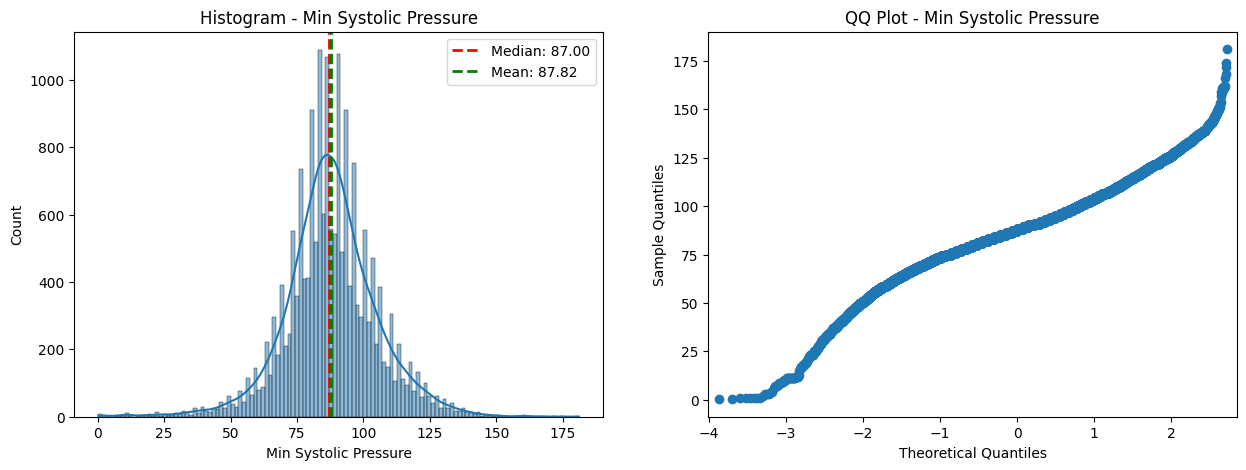

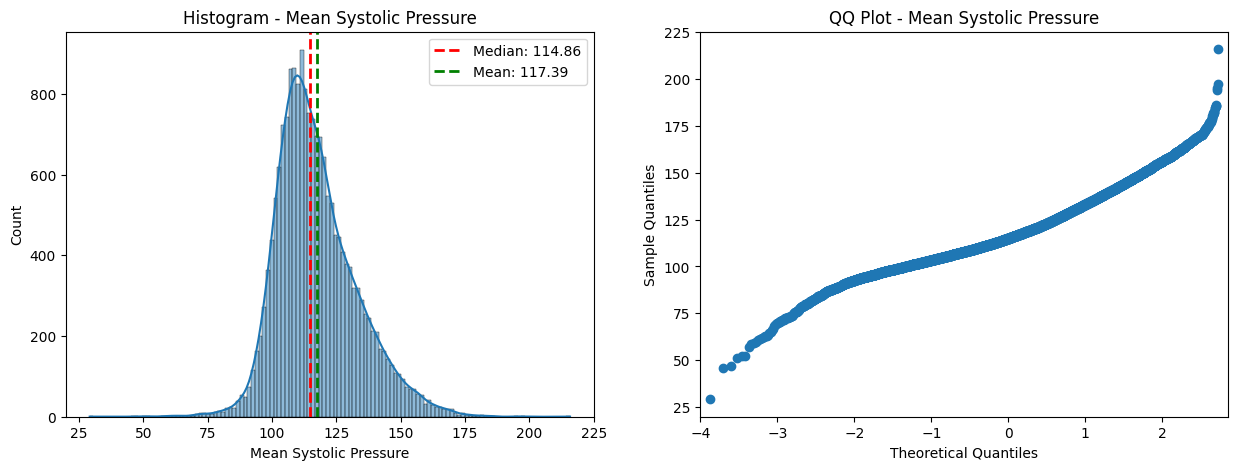

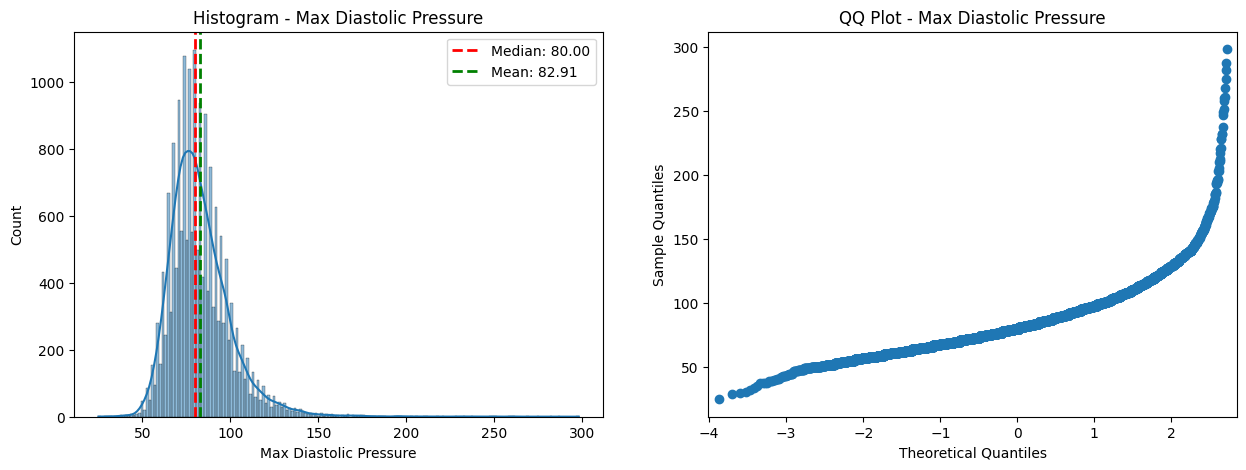

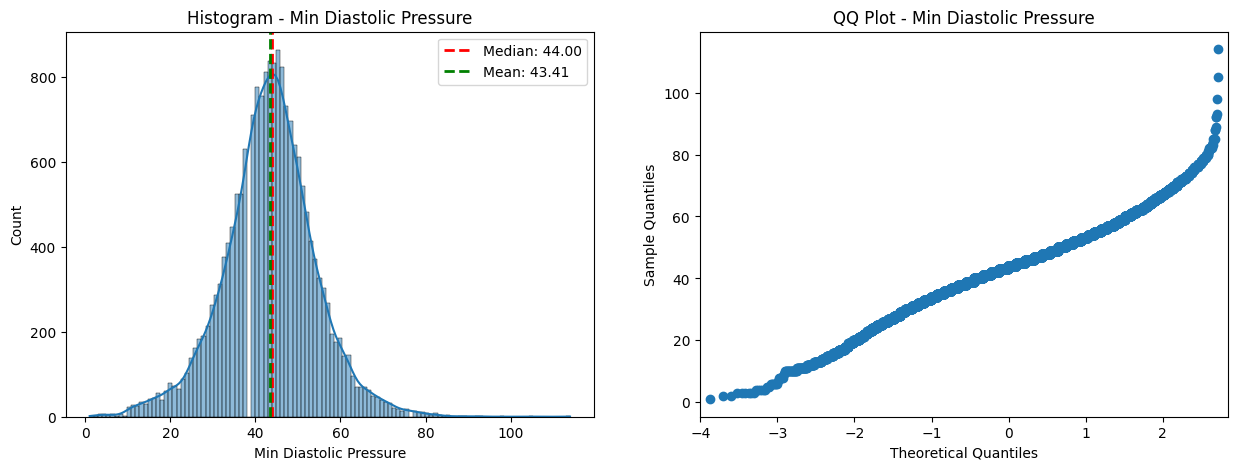

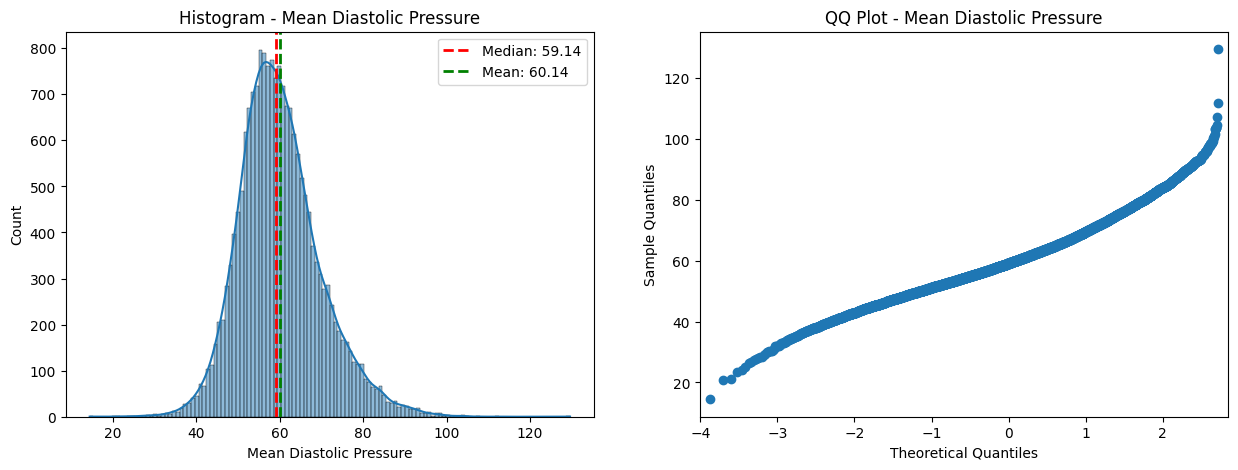

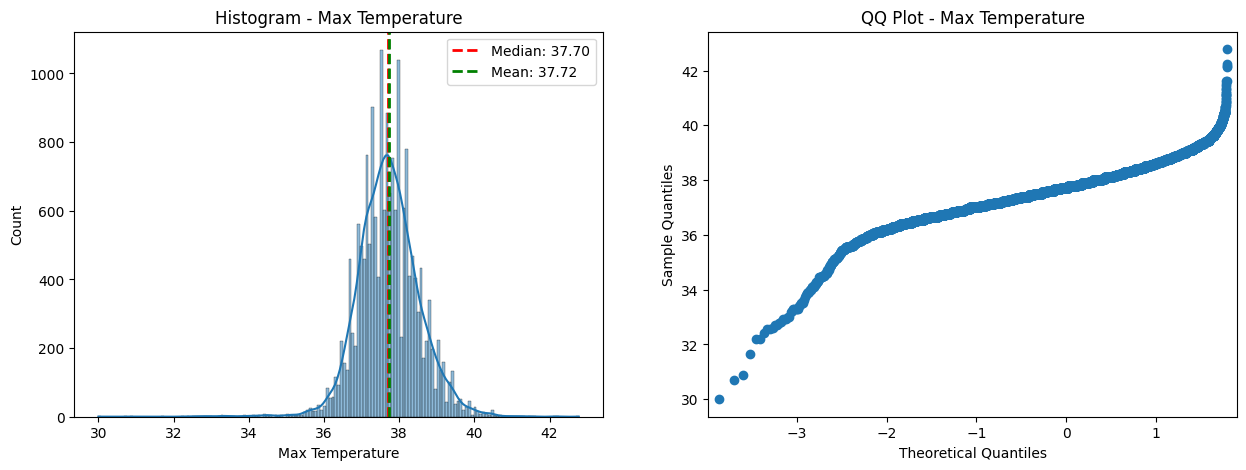

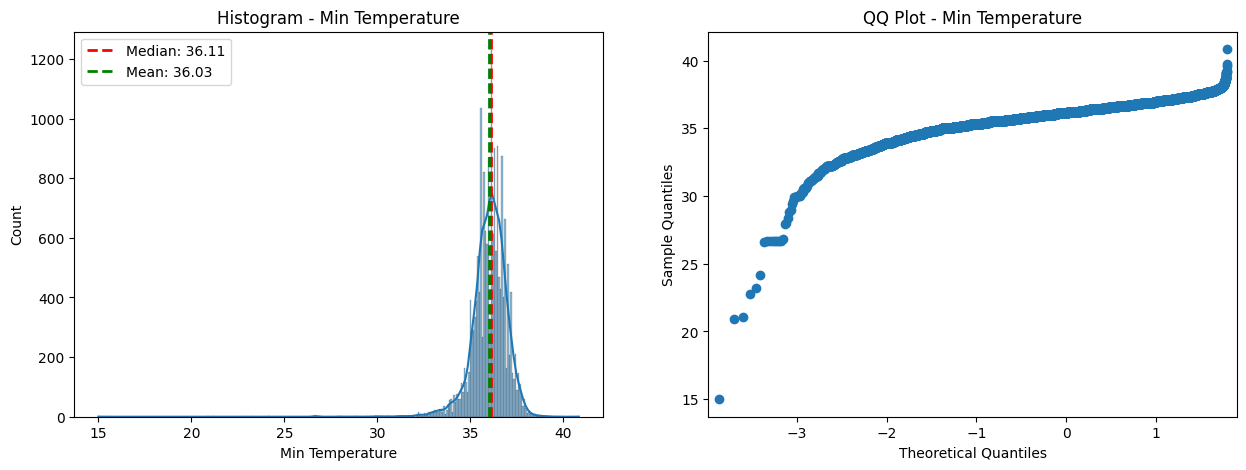

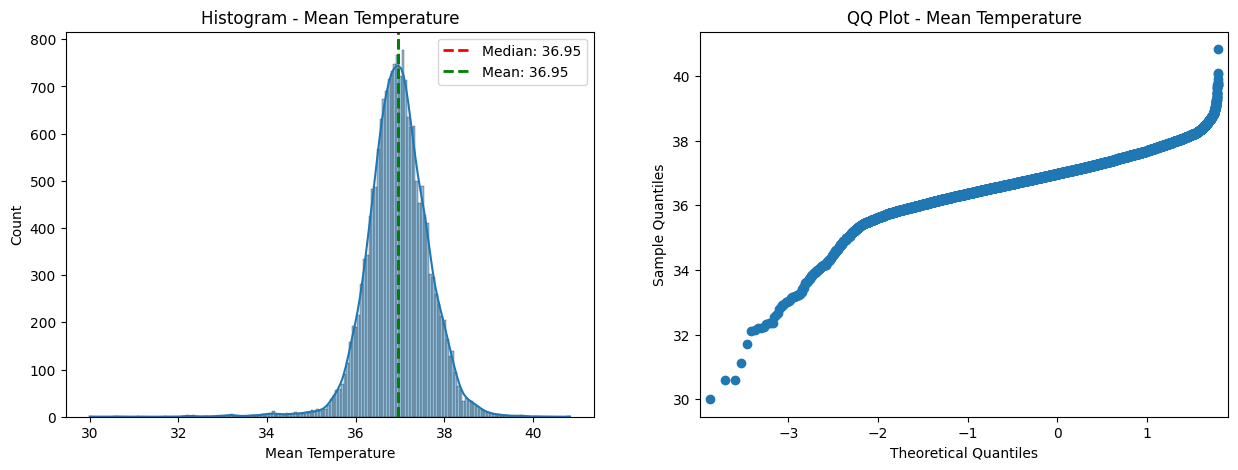

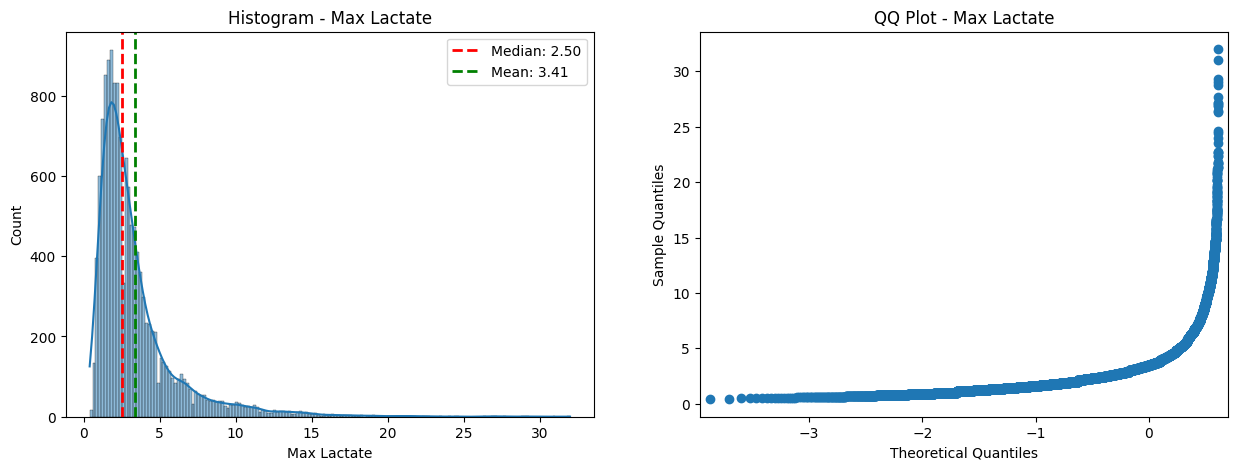

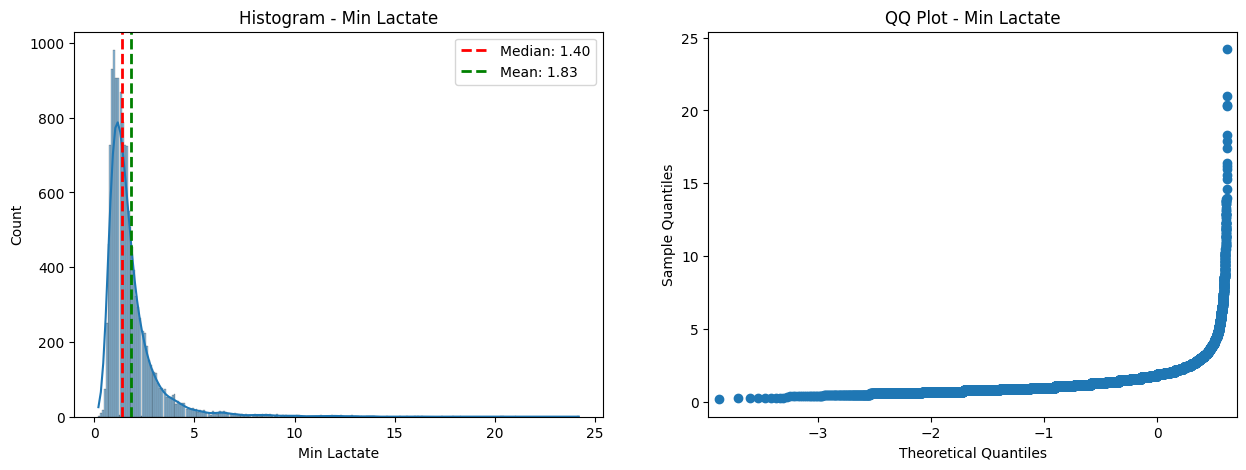

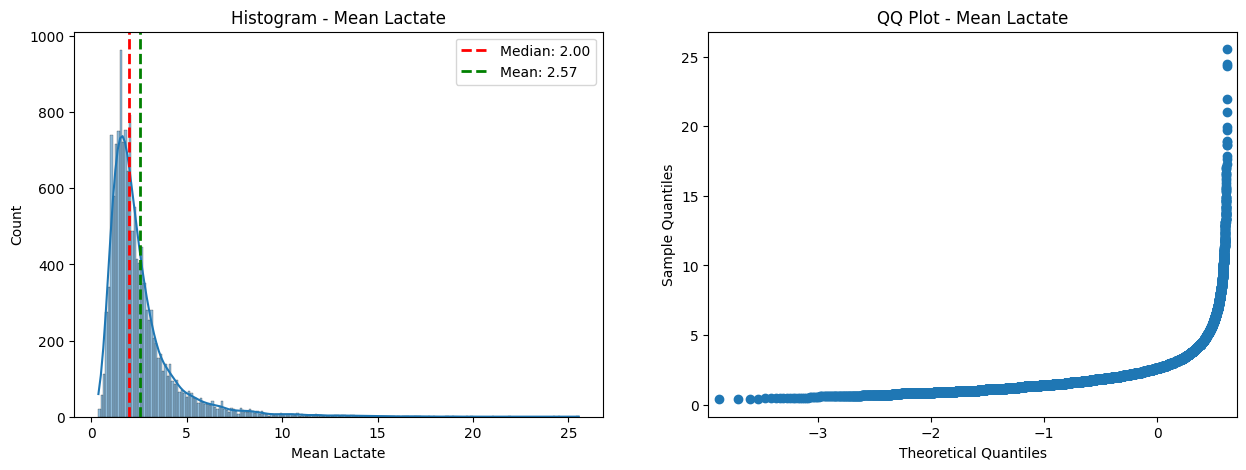

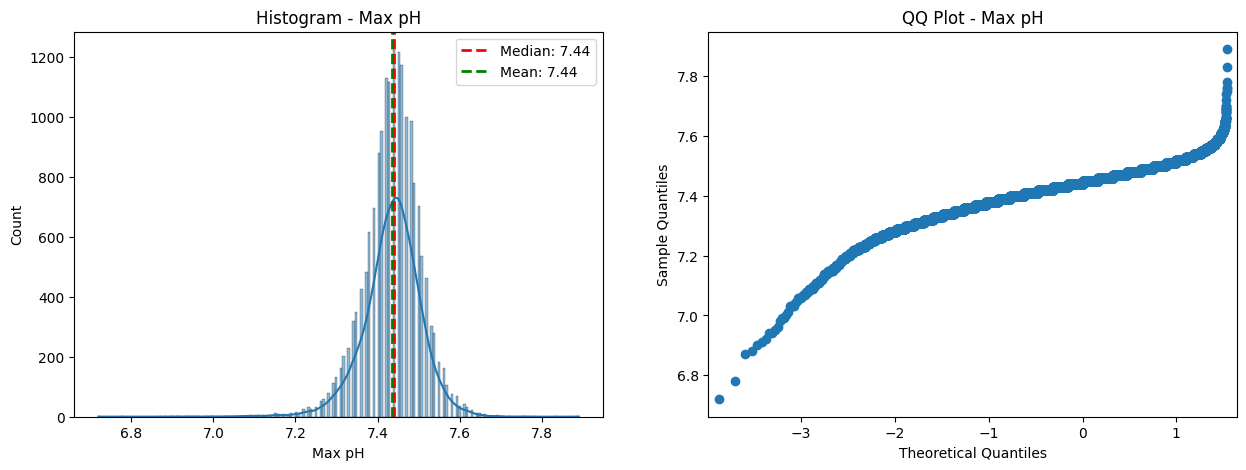

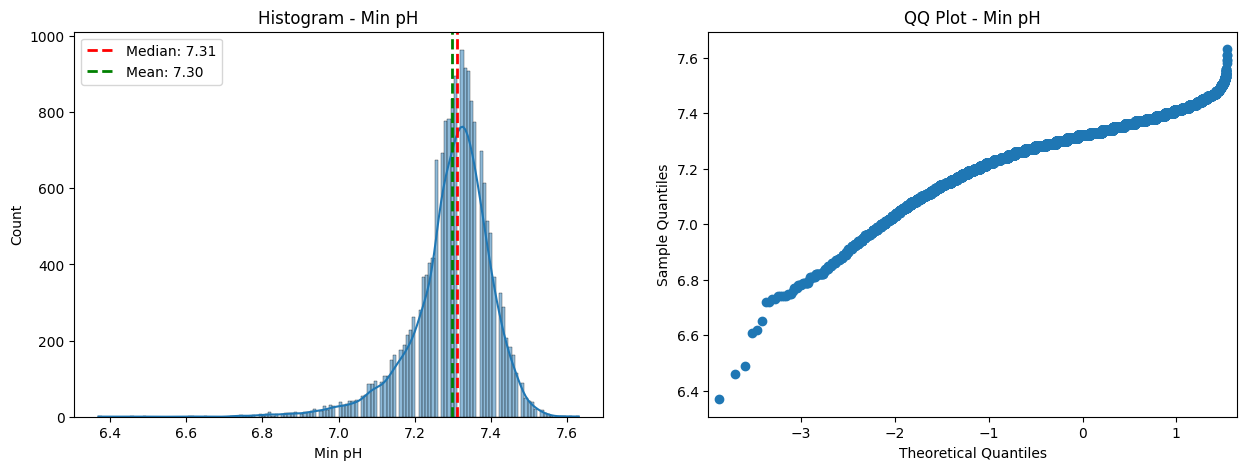

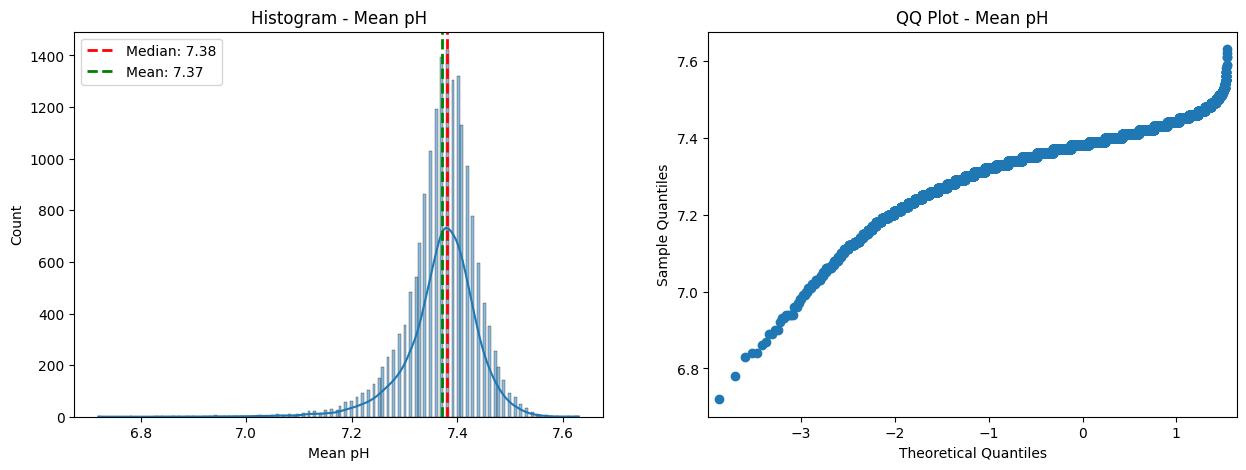

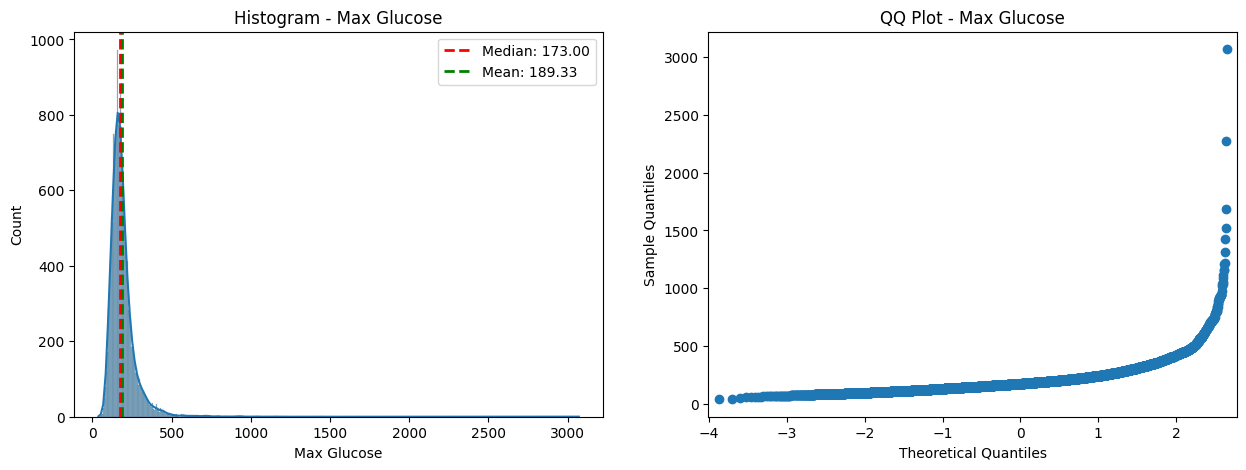

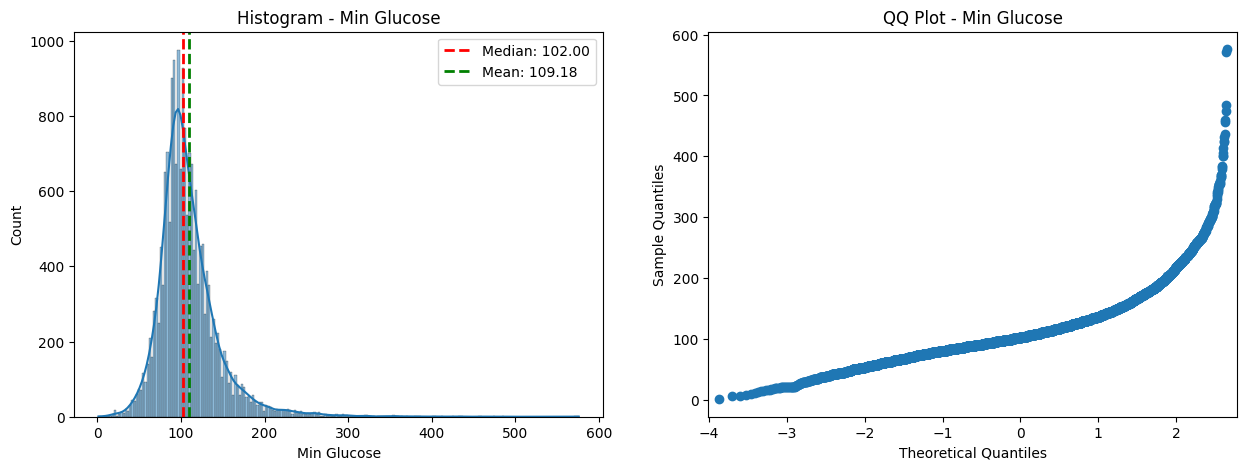

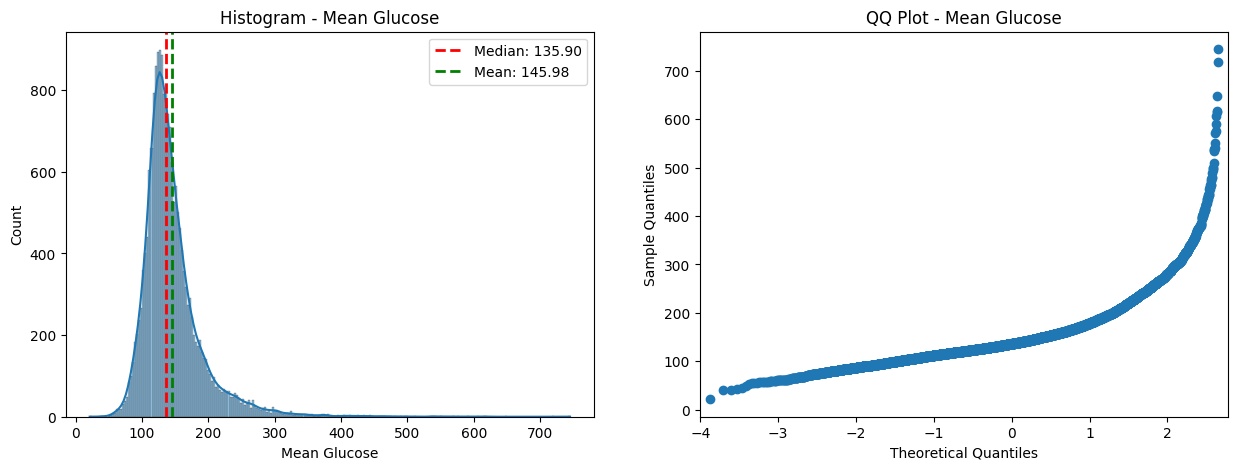

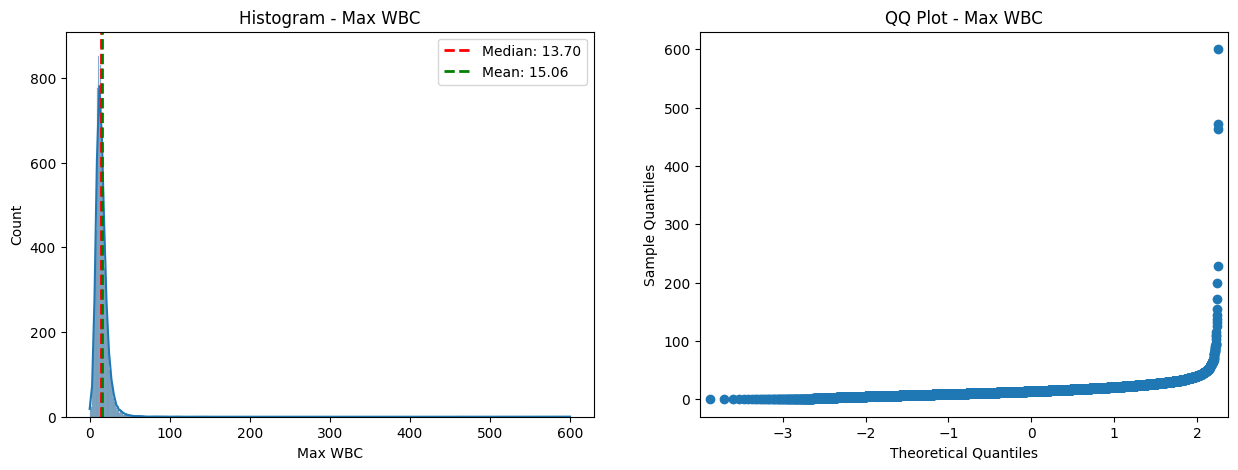

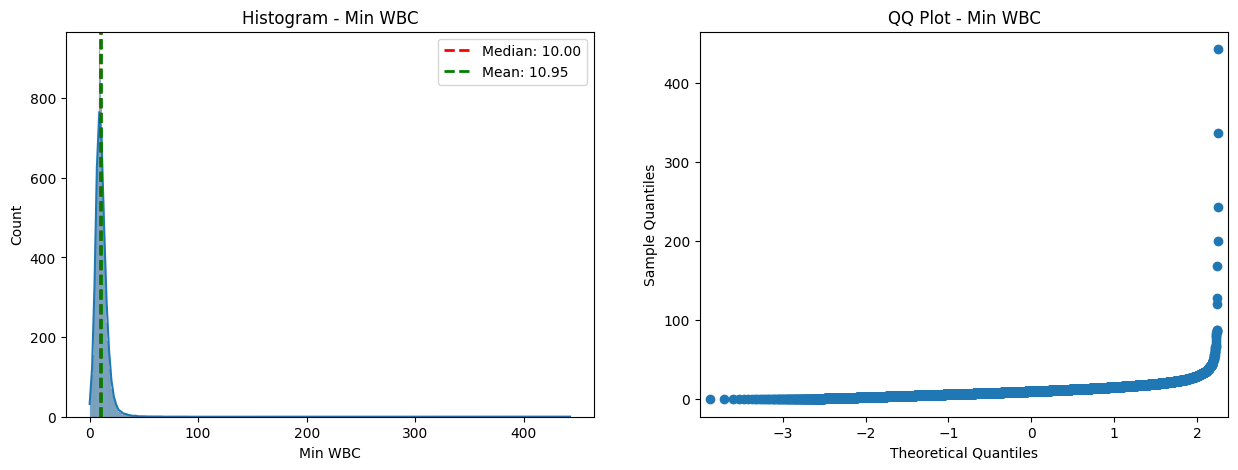

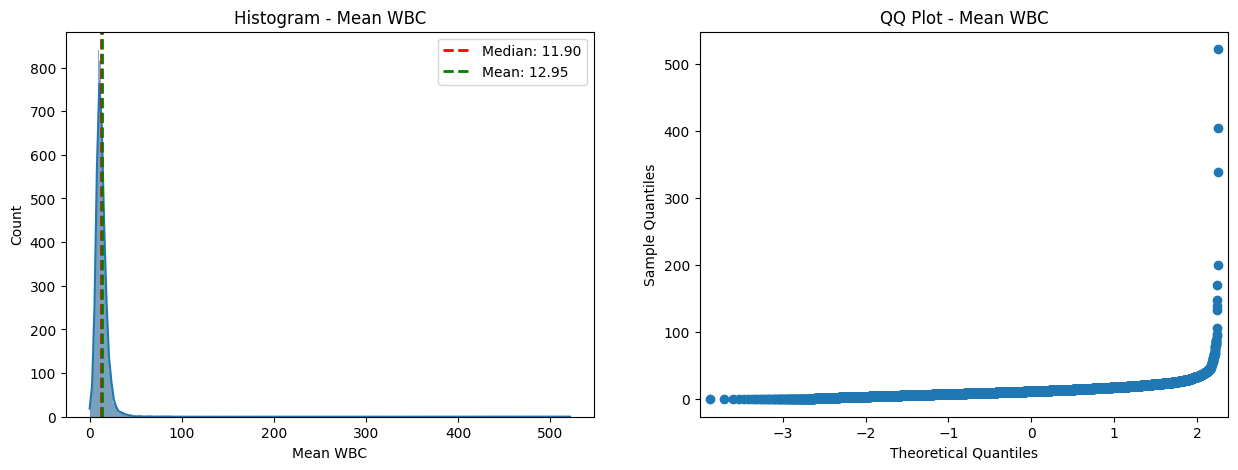

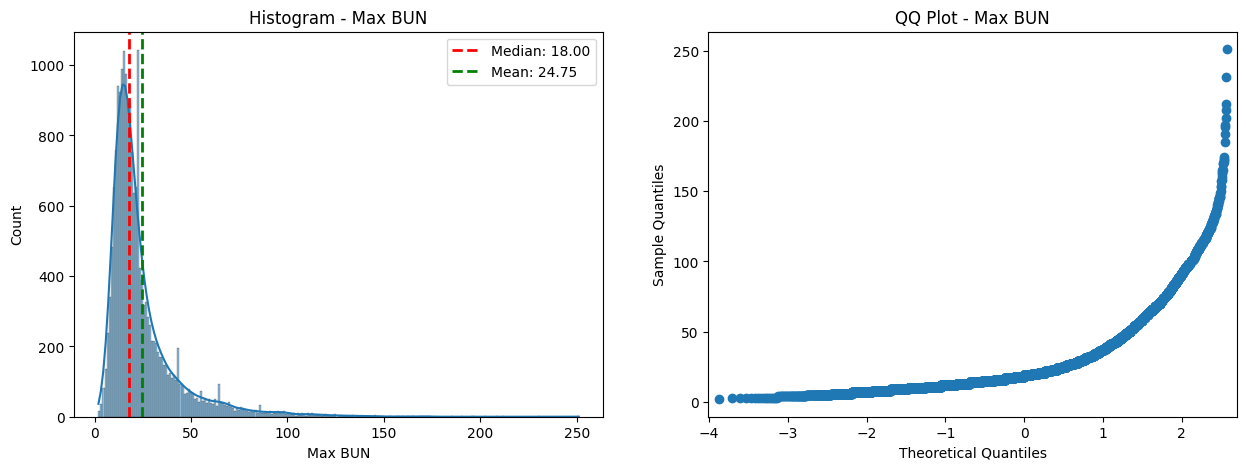

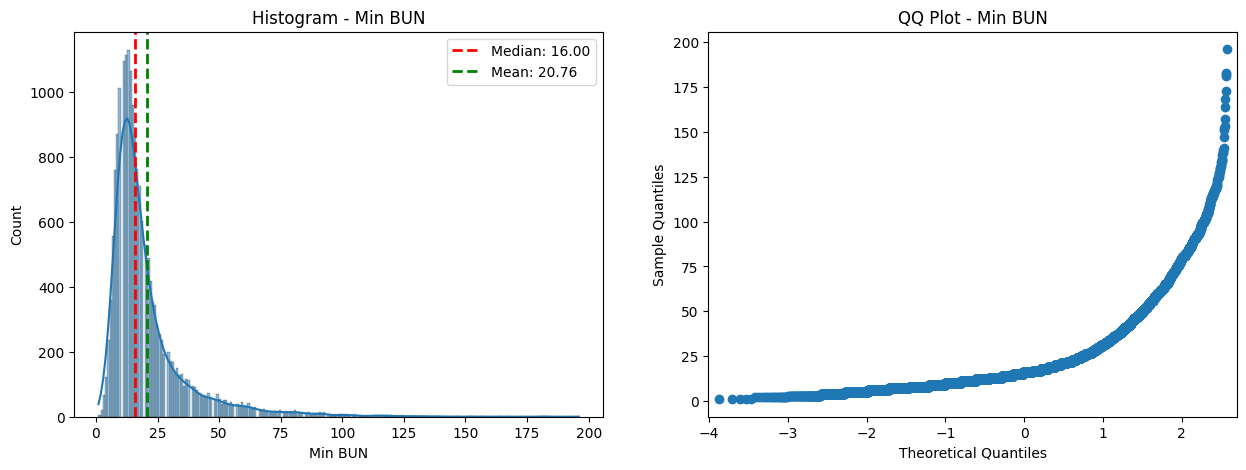

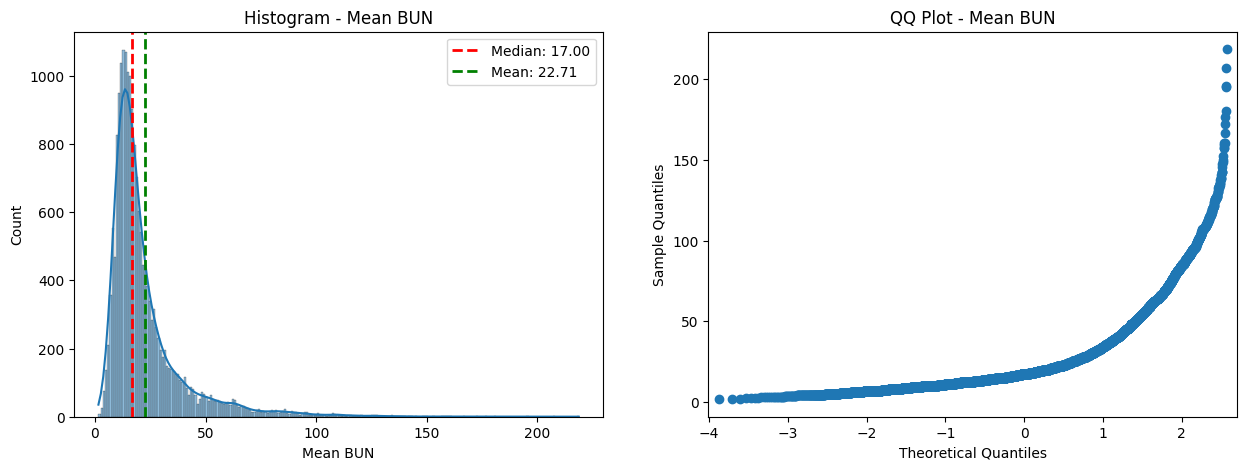

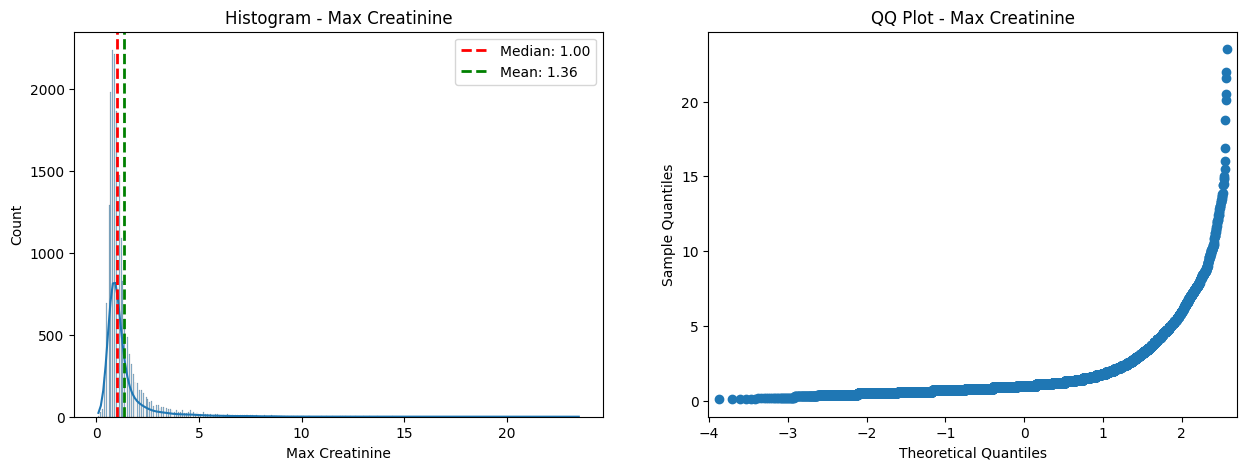

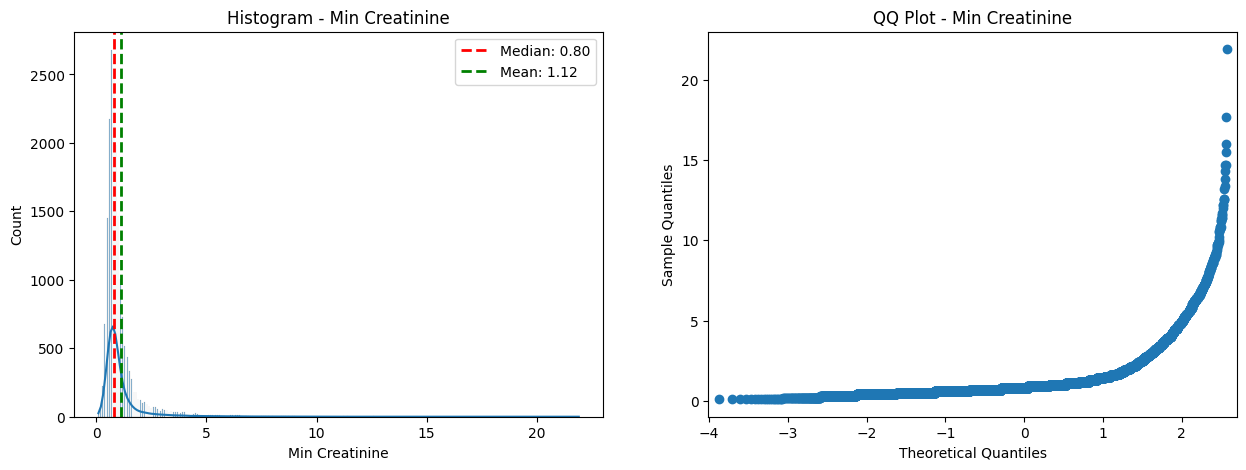

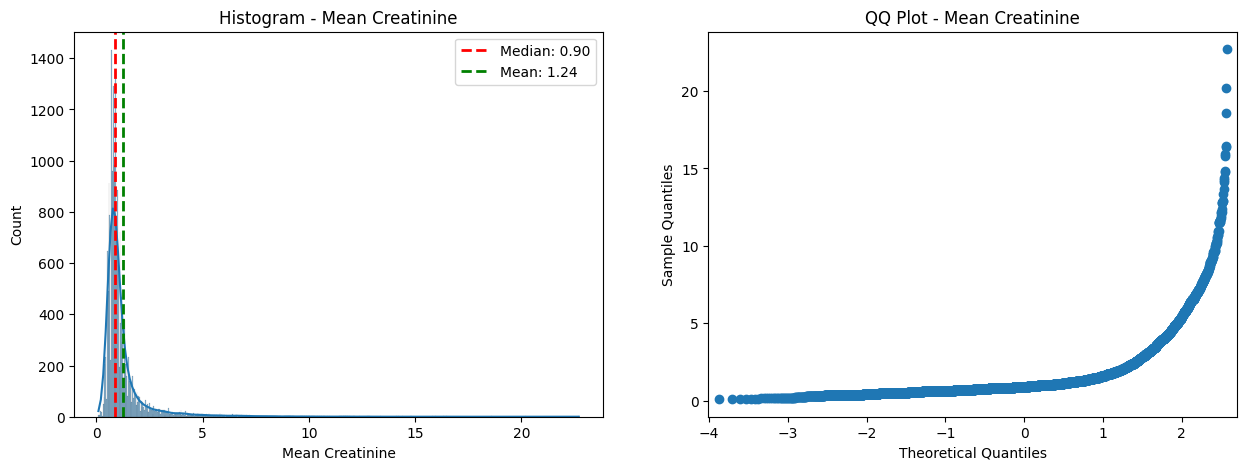

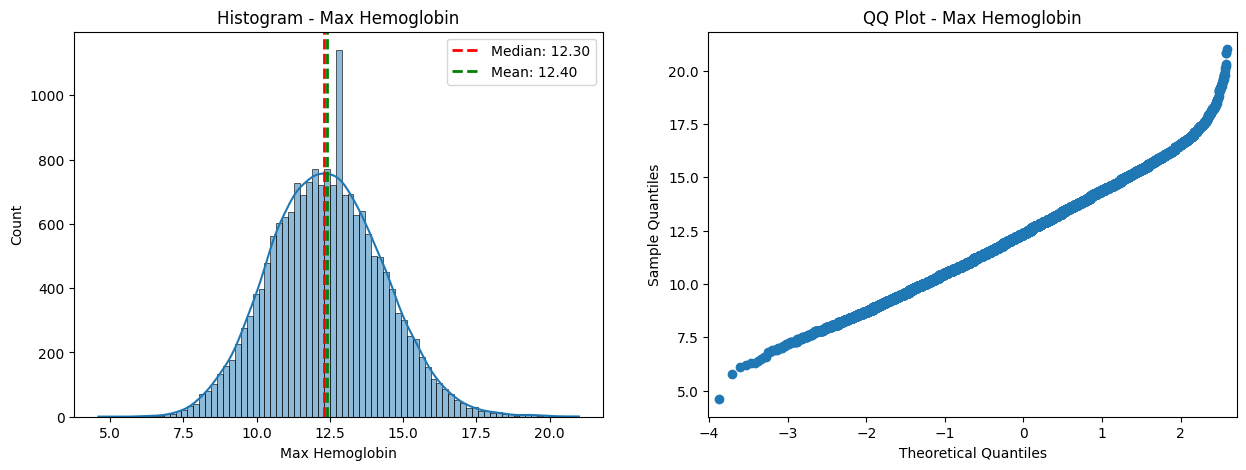

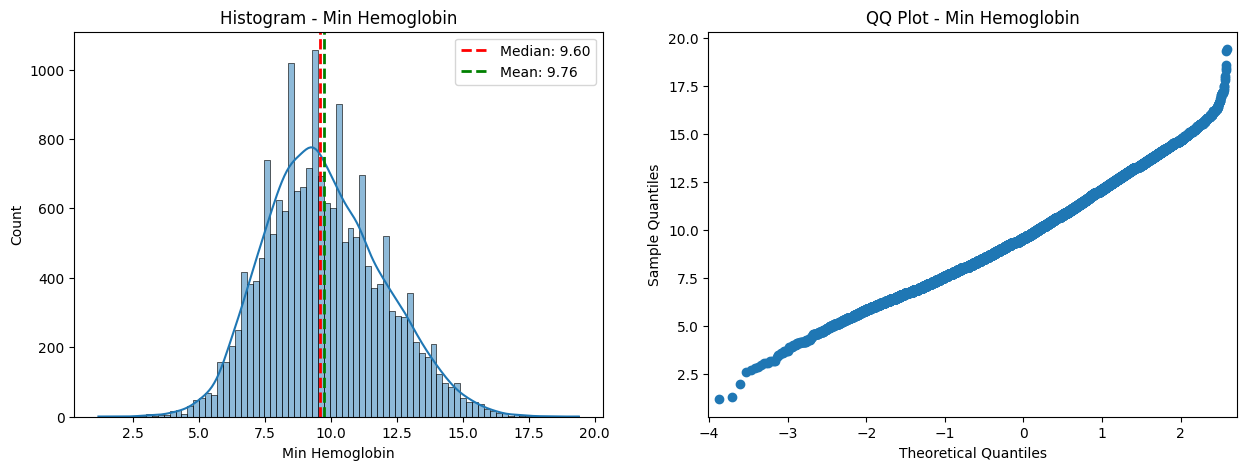

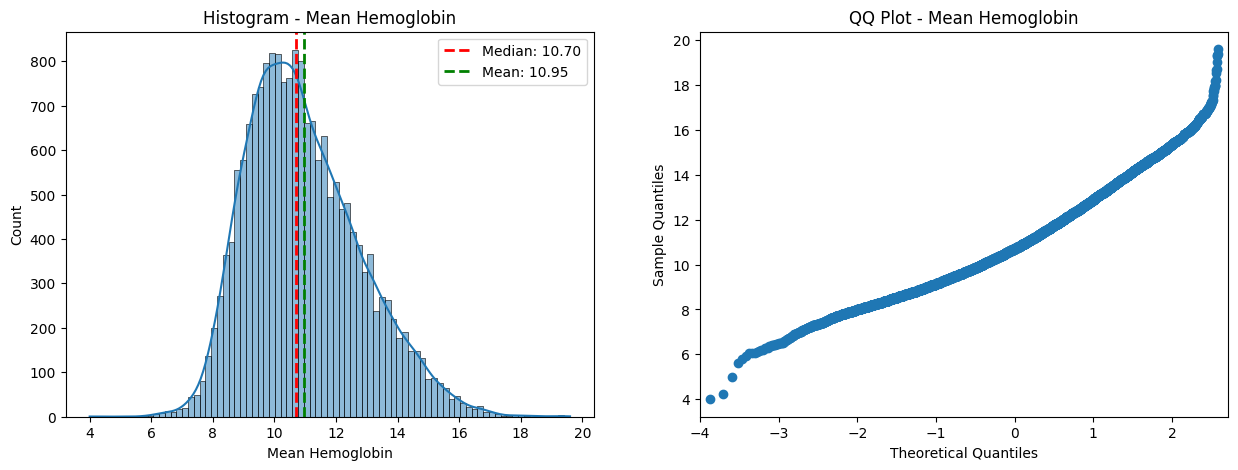

In [44]:
# histogram and QQ plot for each column
def plot_histogram_qqplot(data, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Histogram with median and mean reference lines
    sns.histplot(data[column], kde=True, ax=axes[0])
    median_val = data[column].median()
    mean_val = data[column].mean()
    axes[0].axvline(median_val, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[0].axvline(mean_val, color='g', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[0].set_title(f'Histogram - {column}')
    axes[0].legend()

    # QQ Plot
    sm.qqplot(data[column], line='s', ax=axes[1])
    axes[1].set_title(f'QQ Plot - {column}')

    plt.show()

# Iterate through columns and create plots
for column in cont_all_df.columns:
    if column != 'Hospital Mortality':
        plot_histogram_qqplot(cont_all_df, column)

**Observation:**


- Notice through visual inspection that the outliers are causing the shape to be skewed.

##### **Kolmogorov-Smirnov Test:**
- It can be used to check normality by comparing with normal distribution
- Max value of 1

In [45]:
# Perform Shapiro-Wilk test on each column in cont_all_df: continuous variables
for column in cont_all_df.columns[1:]:
    stat, p = kstest(cont_all_df[column], "norm")
    print(f"Kolmogorov-Smirnov Test for {column}:")
    print(f"  Statistic: {stat}")
    print(f"  p-value: {p}")
    print("")

    if p < 0.05: # null hypothesis rejected
        print(f"The {column} does not follow normal distribution")
        print("---------------------------------------------------------------------")
    else: # null hypothesis failed to reject
        print(f"The {column}follows normal distribution")
        print("---------------------------------------------------------------------")

Kolmogorov-Smirnov Test for Max Heart Rate:
  Statistic: nan
  p-value: nan

The Max Heart Ratefollows normal distribution
---------------------------------------------------------------------
Kolmogorov-Smirnov Test for Min Heart Rate:
  Statistic: nan
  p-value: nan

The Min Heart Ratefollows normal distribution
---------------------------------------------------------------------
Kolmogorov-Smirnov Test for Mean Heart Rate:
  Statistic: nan
  p-value: nan

The Mean Heart Ratefollows normal distribution
---------------------------------------------------------------------
Kolmogorov-Smirnov Test for Max MAP:
  Statistic: nan
  p-value: nan

The Max MAPfollows normal distribution
---------------------------------------------------------------------
Kolmogorov-Smirnov Test for Min MAP:
  Statistic: nan
  p-value: nan

The Min MAPfollows normal distribution
---------------------------------------------------------------------
Kolmogorov-Smirnov Test for Mean MAP:
  Statistic: nan
  p-va